 * Consider `quality` column as y_train
   * Split the dataset into train and test sets (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
   * Train the model using Least Squares Classifier (using both Ridge and Lasso Regularizer), compare the performances with/without classifier, and Logistic Regression
   (https://scikit-learn.org/stable/modules/linear_model.html)
   * Test the model on test set
   * Plot the train accuracy vs test accuracy curves for both models
   * Calculate accuracy, precision, recall, F-1 score, confusion matrix for both models (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
   * Write your observations

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

#Load the dataset
df = pd.read_csv("bonus.csv")
print(df.columns)
df.head(5)

#y_value
y=df["quality"]

#x_value
x=df.drop(columns=["quality"])

#Feature scaling with Min-Max scaling
scaler=MinMaxScaler()
scaled_x=scaler.fit_transform(x)

#Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=42) 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [2]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df_scaled_x=pd.DataFrame(scaled_x)
df_scaled_x.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452


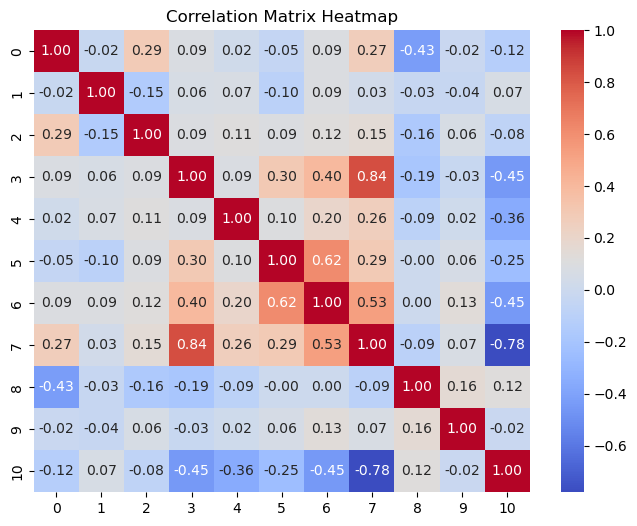

In [4]:
#Finding the correlation among diffrent feature values
correlation_matrix = df_scaled_x.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

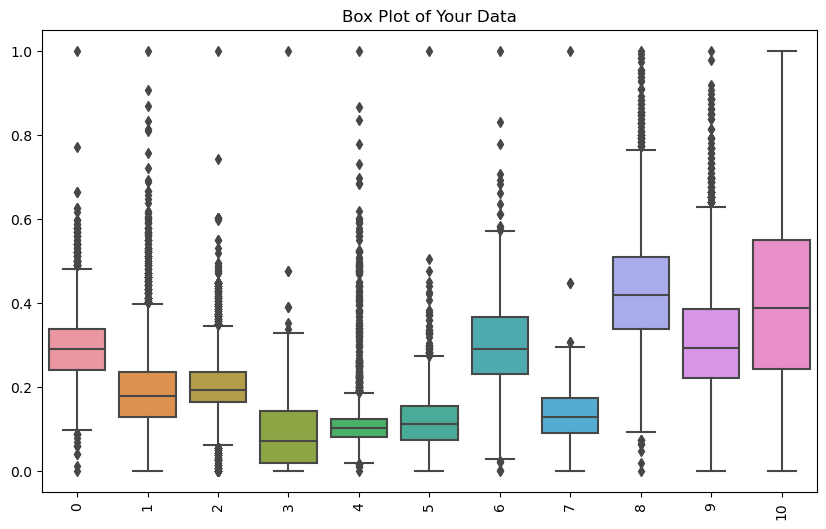

In [5]:
# Create a box plot for your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled_x)
plt.title('Box Plot of Your Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [6]:
# Load the dataset
df = pd.read_csv('bonus.csv')

# Consider 'quality' column as y_train
y = df['quality']

# label = "quality"
unique_quality_val=list(sorted(y.unique()))
print(unique_quality_val)

# Feature scaling using Min-Max scaling
scaler = MinMaxScaler()
x = df.drop(columns=['quality'])
scaled_data = scaler.fit_transform(x)

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

[3, 4, 5, 6, 7, 8, 9]
(3918, 11) (980, 11) (3918,) (980,)


Accuracy Score = 0.5255102040816326
Precision Score = 0.5223406711636518
Recall Score = 0.5255102040816326
F1 Score = 0.4893744784005413


/Users/sanjuktabaruah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/sanjuktabaruah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<function matplotlib.pyplot.show(close=None, block=None)>

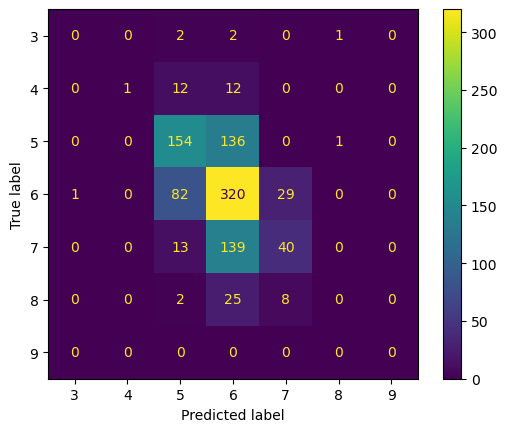

In [7]:
#Logistic regression without regularization
lr_without_reg = LogisticRegression(
    penalty="none",
    solver="lbfgs",
    multi_class="multinomial"
)

lr_without_reg.fit(x_train, y_train)
lr_without_reg_pred = lr_without_reg.predict(x_test)

Accuracy_Score=accuracy_score(y_true=y_test, y_pred=lr_without_reg_pred)

Precision_Score=precision_score(y_true=y_test, y_pred=lr_without_reg_pred, average='weighted')
Recall_Score=recall_score(y_true=y_test, y_pred=lr_without_reg_pred, average='weighted')
F1_Score=f1_score(y_true=y_test, y_pred=lr_without_reg_pred, average='weighted')
Confusion_Matrix=confusion_matrix(y_true=y_test, y_pred=lr_without_reg_pred)

print(f"Accuracy Score = {Accuracy_Score}")
print(f"Precision Score = {Precision_Score}")
print(f"Recall Score = {Recall_Score}")
print(f"F1 Score = {F1_Score}")
cm=confusion_matrix(y_test, lr_without_reg_pred, labels=unique_quality_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_quality_val)
disp.plot()
plt.show

Accuracy Score = 0.5244897959183673
Precision Score = 0.5229817668468548
Recall Score = 0.5244897959183673
F1 Score = 0.48281164229383444


/Users/sanjuktabaruah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sanjuktabaruah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


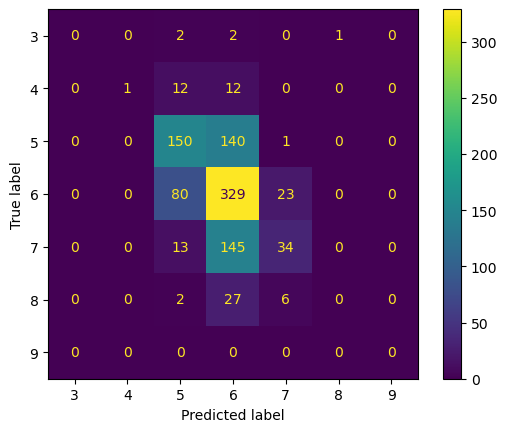

In [8]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with regularisation
lr_with_reg = LogisticRegression(
    penalty="l2",
    C=3,
    solver="lbfgs",
    multi_class="multinomial"  # Correct the parameter value here
)

lr_with_reg.fit(x_train, y_train)
lr_with_reg_pred = lr_with_reg.predict(x_test)

Accuracy_Score = accuracy_score(y_true=y_test, y_pred=lr_with_reg_pred)
Precision_Score = precision_score(y_true=y_test, y_pred=lr_with_reg_pred, average='weighted')
Recall_Score = recall_score(y_true=y_test, y_pred=lr_with_reg_pred, average='weighted')
F1_Score = f1_score(y_true=y_test, y_pred=lr_with_reg_pred, average='weighted')
Confusion_Matrix = confusion_matrix(y_true=y_test, y_pred=lr_with_reg_pred)

print(f"Accuracy Score = {Accuracy_Score}")
print(f"Precision Score = {Precision_Score}")
print(f"Recall Score = {Recall_Score}")
print(f"F1 Score = {F1_Score}")
cm = confusion_matrix(y_test, lr_with_reg_pred, labels=unique_quality_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_quality_val)
disp.plot()
plt.show()

Comparing how well two logistic regression models perform with test data

1. Logistic Regression without regularisation  
Accuracy Score = 0.5255102040816326 = 52.55%<br>
Precision Score = 0.5223406711636518 = 52.23%<br>
Recall Score = 0.5255102040816326 = 52.55%<br>
F1 Score = 0.4893744784005413 = 49%

1. Logistic Regression with regularisation   
Accuracy Score = 0.5244897959183673 = 52.45%<br>
Precision Score = 0.5229817668468548 = 52.31%<br>
Recall Score = 0.5244897959183673 = 52.45%<br>
F1 Score = 0.48281164229383444 = 48.3%

So we can see that:
Accuracy : without regularisation > with regularisation<br>
Precision : without regularisation < with regularisation<br>
Recall : without regularisation > with regularisation<br>
F1 Score : without regularisation > with regularisation<br>

So more or less, all the four parameters are similar with slight difference.<br>
Logistic regression with L2(Ridge) regularization and without L2(Ridge) regularization can yeild very similar results in cases where the data is already well behaved i.e. there is no issue like correlation among the features and overfitting.

<bCHECK FOR CORRELATION:><br>
Here, from the correlation matrix/ Heathmap, we can see that out of 100 features values, there are only 19 values that have more then 0.5 or -0.5, moreover out of those 19, 11 are the direct correlation of features with themselves which is giving us 1. So if we calculate the % of moderate to strong correlated values, it is [(19-11)/(100-11)]*100%=8.9% i.e very less. 

<bCHECK FOR OVERFITTING:><br>
In the above confusion matrix, we can see that when we are:<br>
Using regularisation, 
apart from 3, 8 and 9 all are correctly labelled

Not Using regularisation,
apart from 3, 8 and 9 all are correctly labelled

Since out 7 Unique values, more then 50% is correctly labeled, thus we can say that there is less overfitting.<b>

Hence we have less correlating and less overfitting. thus the model yeilds similar values when we are performing classification with or without regularisation.